# Walkthrough

# Importing modules

In [1]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from classes import preprocess, eda, LDA, KMeansClustering, sentiment_analysis, models

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data preparation (for analysis)


In [3]:
bh_non_dups = preprocess(df='raw data/bhherrera_2.3k.csv',added_stopwords='bh_stopwords.csv', comment_column='comment_text', sent_column=['Correction'], dups=1, 
                           drop=['tiktok_user_id', 'Unnamed: 0', 'Unnamed: 4'])

Column Headers:  ['Unnamed: 0', 'likes', 'comment_text', 'tiktok_user_id', 'Unnamed: 4', 'features', 'features_string_format', 'context_base_prediction', 'Correction']
shape of raw dataframe:  (2387, 9)
Sentiment null count:  Correction    0
dtype: int64
Correction
neutral       1623
negative       707
positive        56
neutrsal         1
dtype: int64
shape of mapped dataframe:  (2387, 9)
Sentiment null count:  Correction    0
dtype: int64
shape of dataframe when null comments were dropped:  (2387, 6)
shape of dataframe when preprocessed and duplicated values where dropped:  (2224, 6)
shape of final dataframe when rows that have null values where dropped:  (2223, 6)


In [4]:
bh_non_dups_eda = eda(bh_non_dups.df, text_column_name='features_string_format', folder='bh_nondups', sent_column_name='Correction')

# Exploratory Data analysis of giucoma data

# non duplicates

In [ ]:
bh_non_dups.df['Correction'].value_counts()

1    1462
0     707
2      54
Name: Correction, dtype: int64

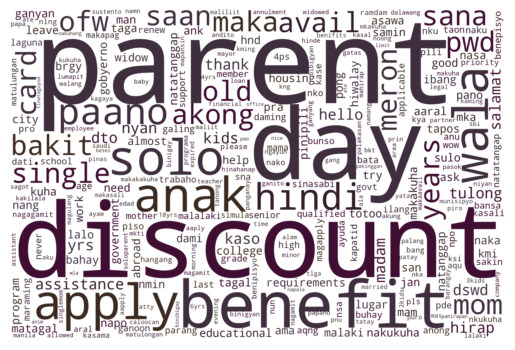

In [6]:
bh_non_dups_eda.generate_wordcloud()

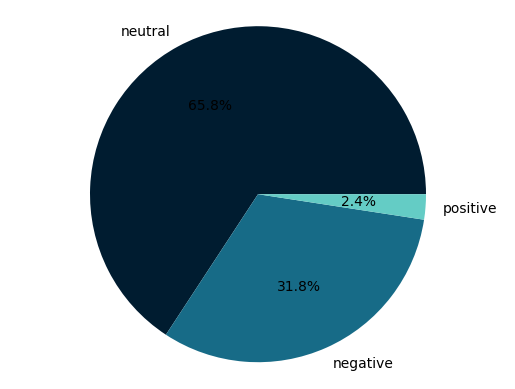

In [7]:
bh_non_dups_eda.pie_sentiment()

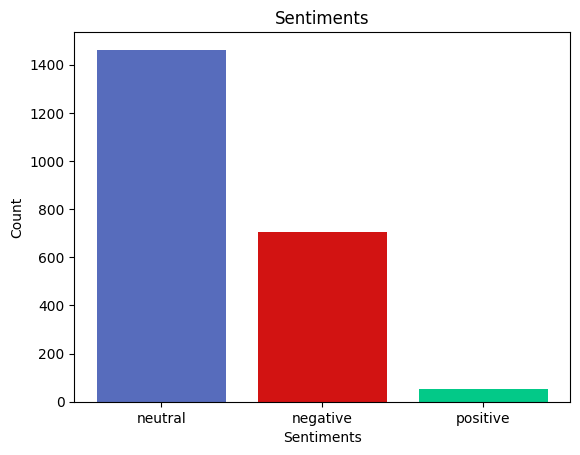

In [8]:
bh_non_dups_eda.bar_sentiment()

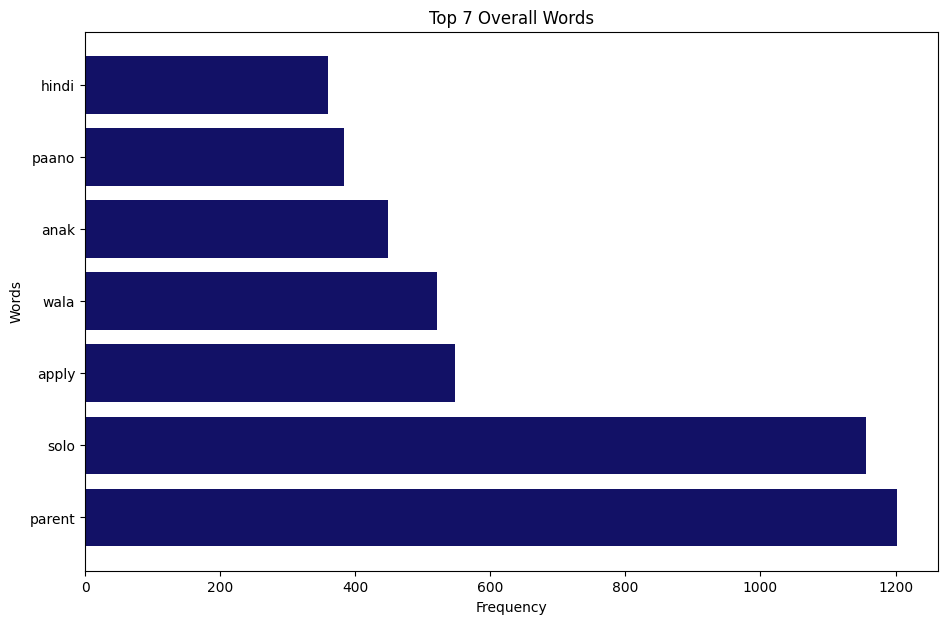

In [9]:
bh_non_dups_eda.top_words(7, 'Overall')

3
gram_size:  3


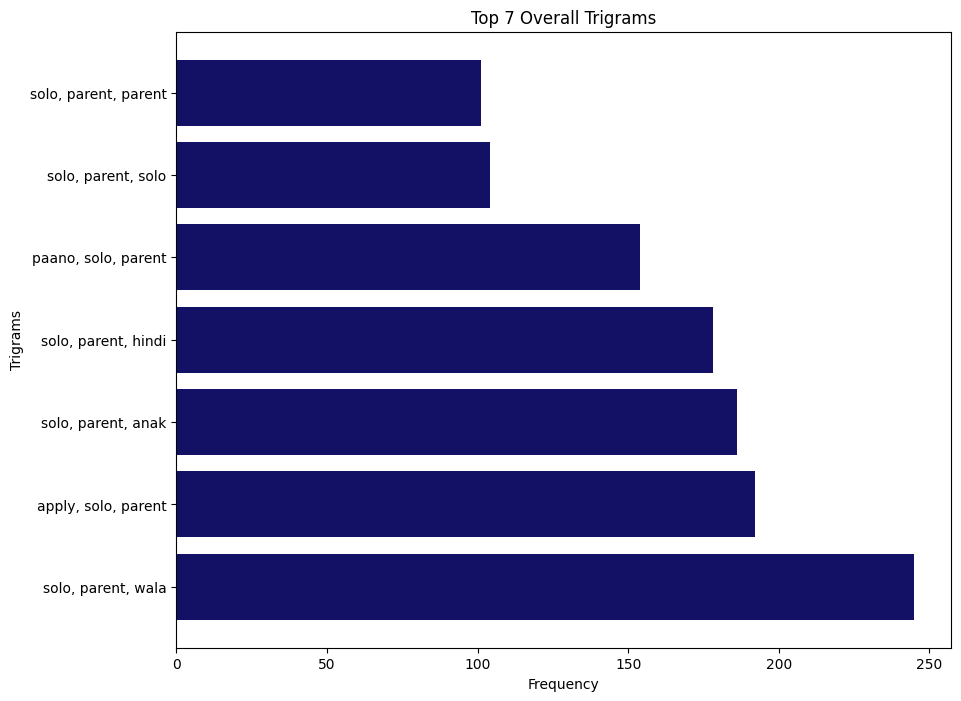

In [10]:
bh_non_dups_eda.grams(7, 'Overall', 'trigram')

2
gram_size:  2


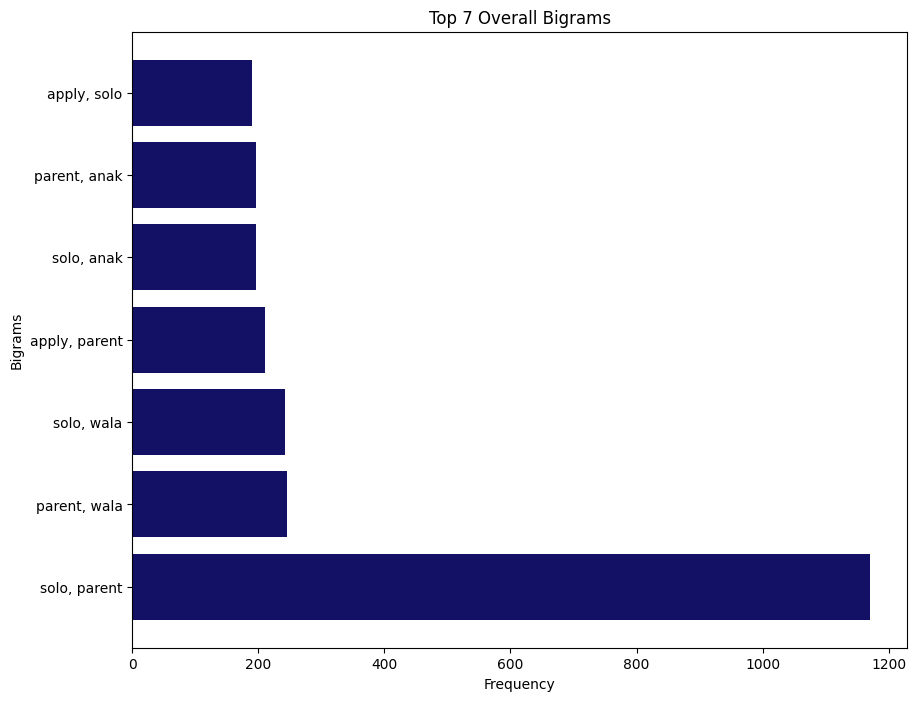

In [11]:
bh_non_dups_eda.grams(7, 'Overall', 'bigram')

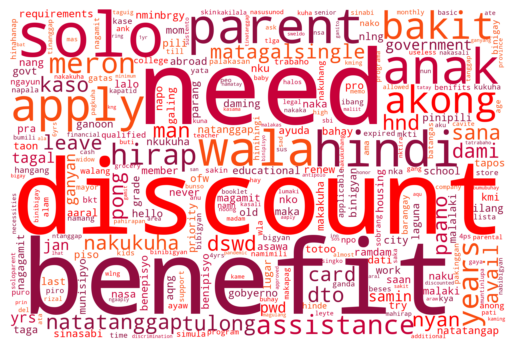

In [13]:
bh_non_dups_eda.generate_wordcloud(category='Correction', value=0)

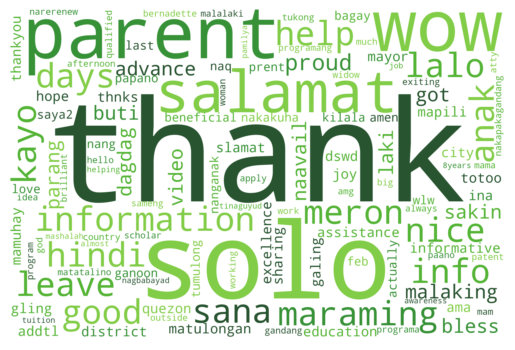

In [14]:
bh_non_dups_eda.generate_wordcloud(category='Correction', value=2)

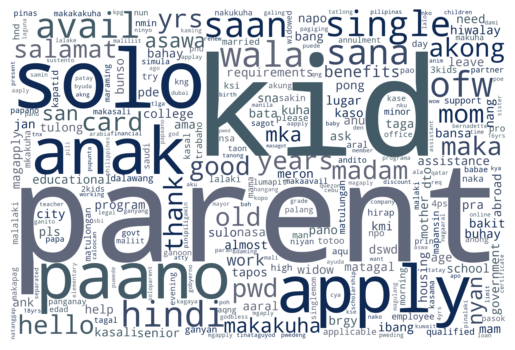

In [15]:
bh_non_dups_eda.generate_wordcloud(category='Correction', value=1)

In [16]:
bh_non_dups_eda.pattern_matching('discount', show_sents=1, show_comments=1)

Total number of comments containing 'discount' = 35:100%
Positive = 0:0.000%
Negative = 30:85.714%
Neutral = 5:14.286%
All comments with the pattern: 

try akong bumili milk gamit solo parent kaso wala discount kasama discounted ids
solo parent nagagamit hindi acknowledge store ddto discount wala nakukuha cash assistance
card magamit discount pabili gatas diaper wala nun
dami pong sinabing benepisyo nakukuha 500 monthly assistance dswdwlang discount basic needs medical benefits
hala solo parent wala discount nadin wala ayuda kolehiyo anak bunso nmana grade
experienced days paid leave nothing wala government educational assistance kala dati discount school tuitio
sana magawan batas magkakaroon discount maintenance medicine
revise solo keme kase obvious discrimination saka cities prov gives discount
solo parent nagagamit anong discounts usually senior citizen lagi binibigyan discount
magamit solo parent grocery bsic necessities sinasabi wala silang memo discount
butuan city wala benefici

In [17]:
bh_non_dups_eda.pattern_matching('solo parent', show_sents=1, show_comments=1)

Total number of comments containing 'solo parent' = 979:100%
Positive = 12:1.226%
Negative = 380:38.815%
Neutral = 587:59.959%
All comments with the pattern: 

wala npapala solo parent lhat sinasabi benifits
2017 member solo parent hnggng wala natanggap organisation taga zambales
apply solo parent
solo parent wala akong nataranggao years akong apply wala
paano avail man saan solo parent papa years coming dec sense nawala mama sana masagot
opo paano meron akong solo parent sana meron anak
solo parent nkaapply napo mkakuha bagong solo parent
saan mkakuha card solo parent housing solo parent
sana paete laguna namimili bibigyan solo parent
apply ndin solo parent kaso hindi pwd malaki anak
ask anak wala bang bisa solo parent ????
nku 1yr solo parent singkong duling wala
2015 member solo parent parental leave enjoy benefits educational financial assistance hindi
paano apply solo parent card
wala dto matagal akong solo parent untill wala sungko
dumami requirements makakuha solo parent
try ako

In [18]:
bh_non_dups_eda.pattern_matching('apply', show_sents=1, show_comments=1)

Total number of comments containing 'apply' = 526:100%
Positive = 1:0.190%
Negative = 97:18.441%
Neutral = 428:81.369%
All comments with the pattern: 

apply
apply solo parent
pano apply san
solo parent wala akong nataranggao years akong apply wala
maka apply
paano 10yrs apply nyan hinde approved
mari akong apply anak malalaki edad ???
apply solo present
apply solo
single mom pano apply
apply ndin solo parent kaso hindi pwd malaki anak
paano apply solo parent card
saan apply single
sana priority yong apply trabaho hirap apply lalo deped
pwed lalake apply solo parent
munisipyo apply solo parent
paano maka avail anak solo parent since 2011 tapos wala akong assistance nakukuha pahirapan apply thank
paano apply solo parent
sana makapag apply
paano apply
apply solo parent kids
naka apply napo nun 2017 hanggan wala prin paano
solo parent almost 8yrs pano mka apply
wla apply wala gngwa
paano ,,, akong anak patay asawa paano apply
saan pwdi apply
paano apply dto saudi work salamat
apply hnd na

In [19]:
bh_non_dups_eda.pattern_matching('abroad', show_sents=1, show_comments=1)

Total number of comments containing 'abroad' = 28:100%
Positive = 0:0.000%
Negative = 12:42.857%
Neutral = 16:57.143%
All comments with the pattern: 

paano abroad makukuha akong benefits anak thanks sagot
papano sumali single paano mali apo kase kase naka balik abroad sana matulungan dinpo
anak apply ganoon dswd qualify abroad
pwd apply nsa abroad solo parent
andito dubai mean abroad
solo parent apply abroad
interested single mom kids also domestic worker abroad
solo parent solo parent bakit ganoon hindi bibigyan nan abroad
applicable parent abroad
nasa abroad benefit solo parent
hindi qualified nasa abroad
ppaano dto abroad
paano solo parent nasa abroad
paano magapply solo parent kpg msa abroad
yrs solo parent pro wala binibigay dswd probinsya nmin tas wala kya abroad
solo parent sinagot sakin abroad pili binibigyan tlga nkakasama loob
solo parent since 2006 wala akong natanggap help galing government abroad
solo parent apply makakuha tinanggap abroad
solo parent paano mavail nasa ab

In [20]:
bh_non_dups_eda.pattern_matching('need', show_sents=1, show_comments=1)

Total number of comments containing 'need' = 28:100%
Positive = 0:0.000%
Negative = 7:25.000%
Neutral = 21:75.000%
All comments with the pattern: 

elow paano mka avail benefits single parent ofw kkauwi dhil mgpagamot need pra mka kuha single parent
nakasali last 2016 tpos nong pay hnd need pirma lalaki solo parent
document need ipasa mswd
solo parent years wala nakukuha taz every irerenew magagastusan need affidavit solo parent p250 xerox
single parent ayaw approved barangay need 2years baby
need annulment hirap maka kuha
need anak lalo health benefits 2yrs ago naaksidente 2legs damage
ipasa need
need 18yrs old bunso hindi naranasan panganay solo parent
need apply
senior high high school pinapaaral hindi naaproved jan need tlga tulong mppsali jan partner
need kpop tulong
bata anak nun hindi bunso need katuwang pagaaral 1styr college sana malaki anak nagaaral
apply need
solo parent malaki anak need kopo sana bahay kaso afford pong maayos trabaho anak
pahirapan daming requirement need a

# Data Preparation for Modelling

In [3]:
# preprocess raw validated data
bam = preprocess(df='validated data/Bam Aquino Raw Comments.csv',added_stopwords='filipino_stopwords.csv', 
                 sent_column=['Comment type (Text-based)'],comment_column='Comment', dups=1)

# preprocess raw validated data
laz = preprocess(df='validated data/Lazada Review.csv',added_stopwords='filipino_stopwords.csv', 
                 comment_column='review', sent_column=['rating'], dups=1)

# preprocess raw validated data
guicoma = preprocess(df='validated data/giucoma_comments.csv', added_stopwords='filipino_stopwords.csv',
                          sent_column=['TEXT-BASED'],comment_column='comment_text', dups=1)

Column Headers:  ['Comment', 'Comment type (Text-based)', 'Comment Image Rate', 'Account', 'Comment Validation (Context-based)', 'Notes', 'Video Link', 'Unnamed: 7']
shape of raw dataframe:  (5496, 8)
Sentiment null count:  Comment type (Text-based)    0
dtype: int64
Comment type (Text-based)
neutral                      3289
negative                     1561
positive                      640
positve                         2
nagative                        1
neitral                         1
posiive                         1
dtype: int64
shape of mapped dataframe:  (5495, 8)
Sentiment null count:  Comment type (Text-based)    0
dtype: int64
shape of dataframe when null comments were dropped:  (5495, 10)
shape of dataframe when preprocessed and duplicated values where dropped:  (2780, 10)
shape of final dataframe when rows that have null values where dropped:  (2779, 10)
Column Headers:  ['Unnamed: 0', 'review', 'rating']
shape of raw dataframe:  (1002, 3)
Sentiment null count:  rating

In [4]:
bam.df['Comment type (Text-based)'].value_counts()

1    1335
0    1069
2     375
Name: Comment type (Text-based), dtype: int64

In [5]:
laz.df['rating'].value_counts()

0    340
1    293
2    245
Name: rating, dtype: int64

In [6]:
guicoma.df['TEXT-BASED'].value_counts()

1.0    365
2.0    115
0.0     73
Name: TEXT-BASED, dtype: int64

In [7]:
bam_parphrase = bam.paraphrase(list_of_paraphrasing=[['thank', 'salamat'],['correct','tama'],['support','suporta'],['galing','ganda'], ['suportaing','supporting']], category=2)
laz_parphrase = laz.paraphrase(list_of_paraphrasing=[['thank', 'salamat'],['good','great'], ['ganda','anganda'], ['maganda','anganda']], category=2)
guicoma_paraphrase = guicoma.paraphrase(list_of_paraphrasing=[['nice', 'great'],['good','great']], category=2)

In [8]:
print(bam.df[bam.df['Comment type (Text-based)'] == 2].shape, laz.df[laz.df['rating'] == 2].shape, guicoma.df[guicoma.df['TEXT-BASED'] == 2].shape)

(375, 10) (245, 5) (115, 13)


In [9]:
print(bam_parphrase.shape, laz_parphrase.shape, guicoma_paraphrase.shape)

(73, 10) (164, 5) (13, 13)


In [10]:
# take only the needed features
bam.df = bam.df[['features_string_format','Comment type (Text-based)']]
bam_parphrase = bam_parphrase[['features_string_format','Comment type (Text-based)']]
laz.df = laz.df[['features_string_format','rating']]
laz_parphrase = laz_parphrase[['features_string_format','rating']]
guicoma.df = guicoma.df[['features_string_format','TEXT-BASED']]
guicoma_paraphrase = guicoma_paraphrase[['features_string_format','TEXT-BASED']]

In [11]:
# rename columns
bam.df.rename(columns={'features_string_format': 'Comment', 'Comment type (Text-based)': 'category'}, inplace=True, errors='raise')
laz.df.rename(columns={'features_string_format': 'Comment', 'rating': 'category'}, inplace=True, errors='raise')
guicoma.df.rename(columns={'features_string_format': 'Comment', 'TEXT-BASED': 'category'}, inplace=True, errors='raise')
bam_parphrase.rename(columns={'features_string_format': 'Comment', 'Comment type (Text-based)': 'category'}, inplace=True, errors='raise')
laz_parphrase.rename(columns={'features_string_format': 'Comment', 'rating': 'category'}, inplace=True, errors='raise')
guicoma_paraphrase.rename(columns={'features_string_format': 'Comment', 'TEXT-BASED': 'category'}, inplace=True, errors='raise')

In [12]:
temp = pd.concat([bam.df, laz.df, guicoma.df, laz_parphrase, bam_parphrase, guicoma_paraphrase])

In [13]:
temp.shape

(4461, 2)

In [14]:
temp['category'].value_counts()

1.0    1993
0.0    1482
2.0     985
Name: category, dtype: int64

In [15]:
positive = temp[temp['category'] == 2]
negative = temp[temp['category'] == 0]
neutral = temp[temp['category'] == 1]

In [16]:
full_positive = positive.sample(frac=1, random_state=42)
full_negative = negative.sample(frac=1, random_state=42)
full_neutral = neutral.sample(frac=1, random_state=42)

In [17]:
full_positive = full_positive.sample(1000, replace=True)
full_negative = full_negative.sample(1000)
full_neutral = full_neutral.sample(1000)

In [18]:
temp_full = pd.concat([full_positive, full_negative, full_neutral])

In [19]:
temp_full.shape

(3000, 2)

# Exploratory Data Analysis of modelling data

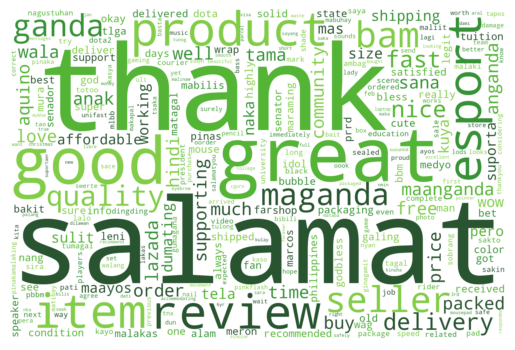

In [29]:
positive_eda = eda(df=full_positive, text_column_name='Comment', sent_column_name='category')
positive_eda.generate_wordcloud(category='category', value=2)

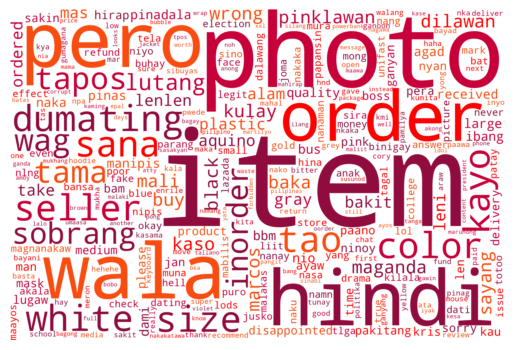

In [30]:
negative_eda = eda(df=full_negative, text_column_name='Comment', sent_column_name='category')
negative_eda.generate_wordcloud(category='category', value=0)

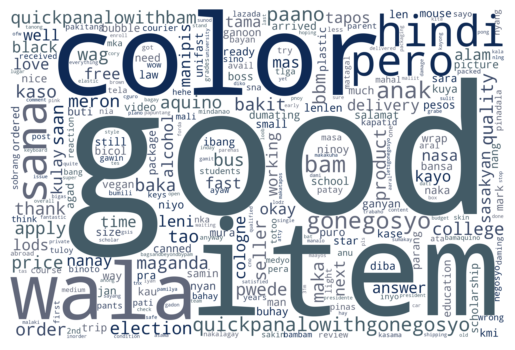

In [31]:
neutral_eda = eda(df=full_neutral, text_column_name='Comment', sent_column_name='category')
neutral_eda.generate_wordcloud(category='category', value=1)

# Modelling

In [20]:
temp_full

,Comment,category
190,thank support ing community god bless,2.0
2502,gabby nagmana pati kabaitan suplado,2.0
2422,salamat walang tigil ninyong pagsubaybay leni ...,2.0
113,fan thank supporting community,2.0
56,rubzkie naka avail anak grade college free tui...,2.0
...,...,...
120,playing mobile legends bam,1.0
632,beke next purchase freebie 2nd order dami nabi...,1.0
3893,pars kunwari maka masa pakitang tao,1.0
216,sana maka laro kita trashtalk kita,1.0


In [21]:
x = models(df=temp_full, x='Comment', y='category', filename='3k_text_base')

In [22]:
x.svm()

svm or dectree
Accuracy: 0.6966666666666667
F1 score (micro): 0.6966666666666667
F1 score (macro): 0.6993468328480924
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       200
           1       0.61      0.60      0.60       200
           2       0.89      0.82      0.86       200

    accuracy                           0.70       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.70      0.70      0.70       600



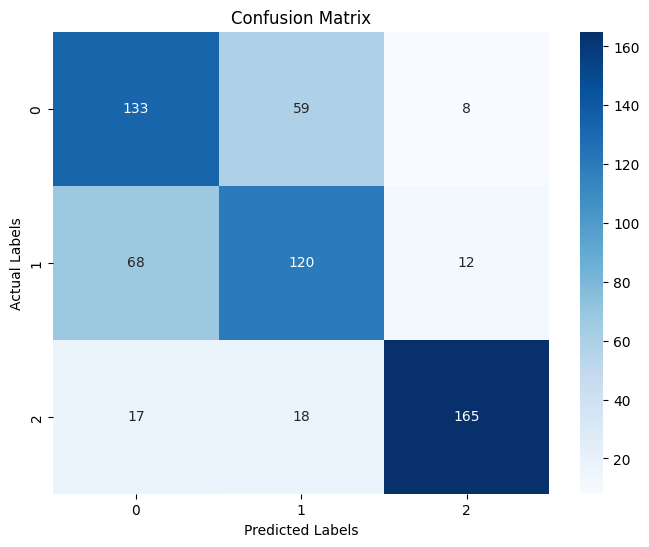

In [23]:
x.evaluate_model()

In [26]:
y = models(df=temp_full, x='Comment', y='category', filename='3k_text_base')

In [27]:
y.decision_tree()

svm or dectree
Accuracy: 0.6733333333333333
F1 score (micro): 0.6733333333333333
F1 score (macro): 0.6692971666763782
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       200
           1       0.58      0.68      0.63       200
           2       0.77      0.83      0.80       200

    accuracy                           0.67       600
   macro avg       0.68      0.67      0.67       600
weighted avg       0.68      0.67      0.67       600



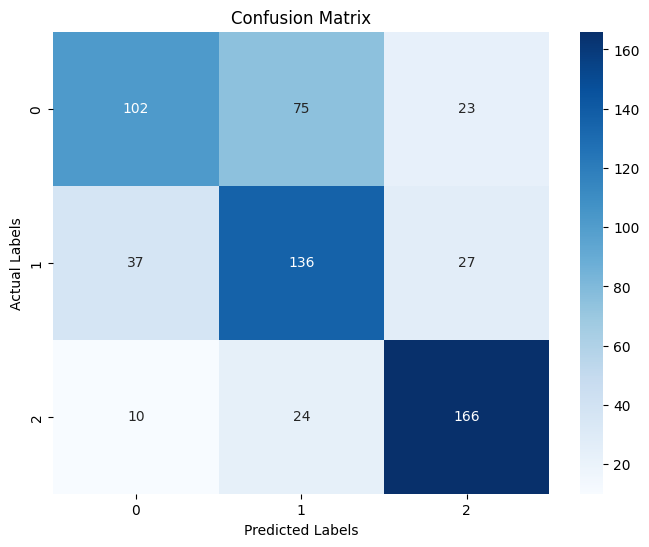

In [28]:
y.evaluate_model()

# END OF PROGRAM